In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

##Задача 1
###Скачать данные

In [3]:
#считываем датасет

df = pd.read_csv('kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###Изучите стоимости недвижимости

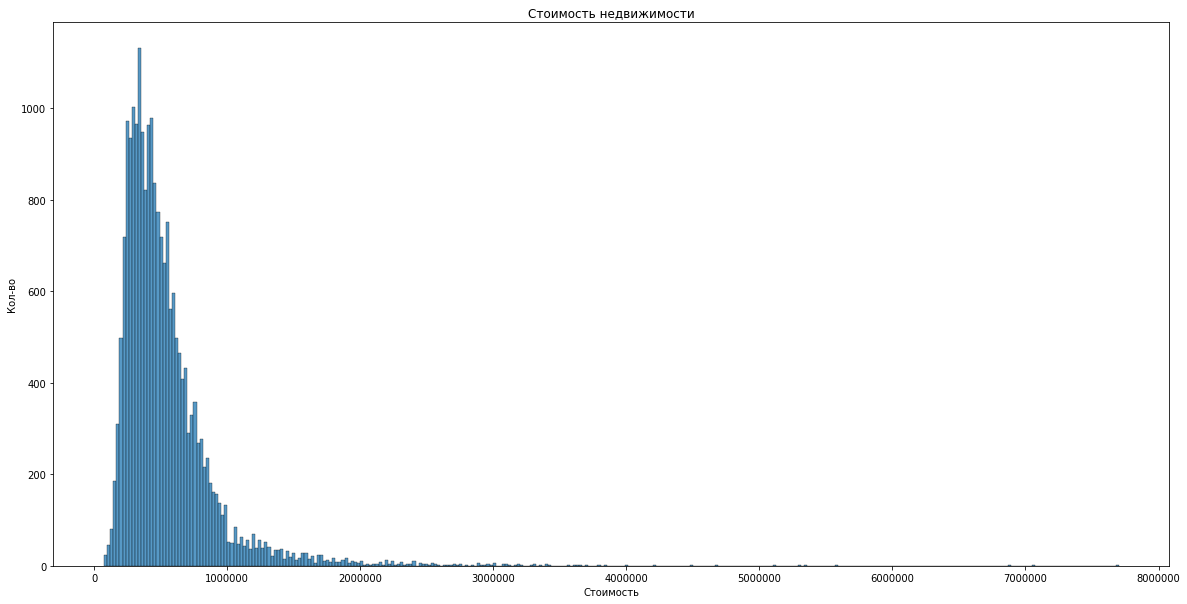

In [20]:
plt.figure(figsize=(20, 10))
#plt.hist(df['price'], bins=45);
sns.histplot(df['price']);
plt.ticklabel_format(style='plain')
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во');

###Изучите распределение квадратуры жилой

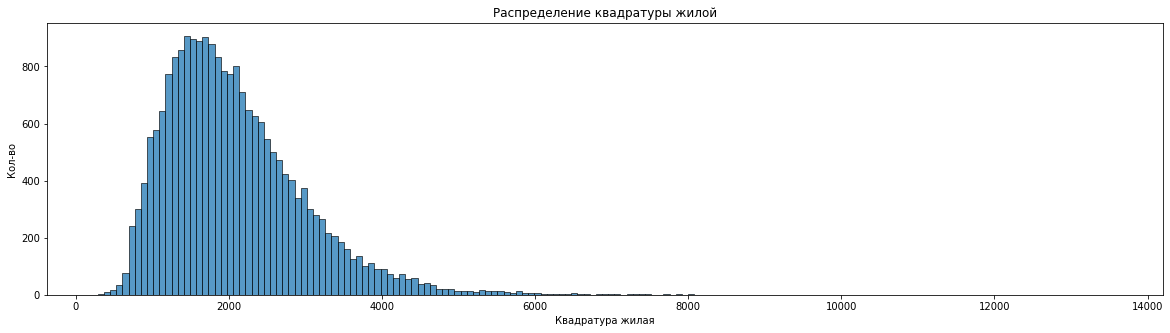

In [14]:
plt.figure(figsize=(20, 5))
sns.histplot(df['sqft_living']);
plt.title('Распределение квадратуры жилой')
plt.xlabel('Квадратура жилая')
plt.ylabel('Кол-во');

###Изучите распределение года постройки

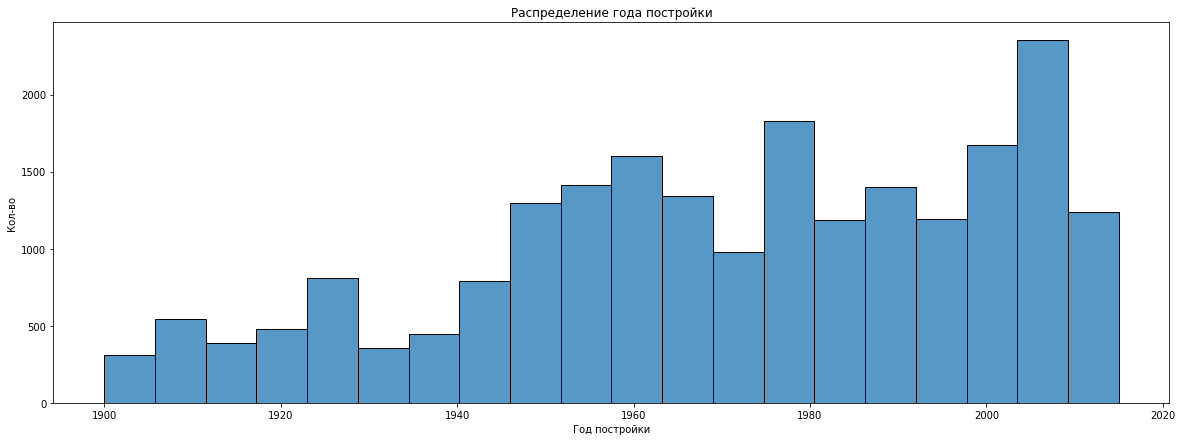

In [11]:
plt.figure(figsize=(20, 7))
sns.histplot(df['yr_built'], bins=20);
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во');

##Задача 2
###Изучите распределение домов от наличия вида на набережную  
Постройте график  
Сделайте выводы

In [23]:
data = df['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

Text(0.5, 1.0, 'Распределение домов от наличия вида на набережную')

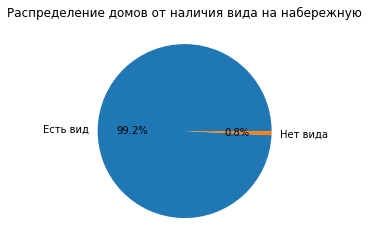

In [30]:
labels = ['Есть вид', 'Нет вида']
plt.pie(data, autopct='%1.1f%%', labels=labels)
plt.title('Распределение домов от наличия вида на набережную')

### Изучите распределение этажей домов

In [31]:
data1 = df['floors'].value_counts()
data1

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

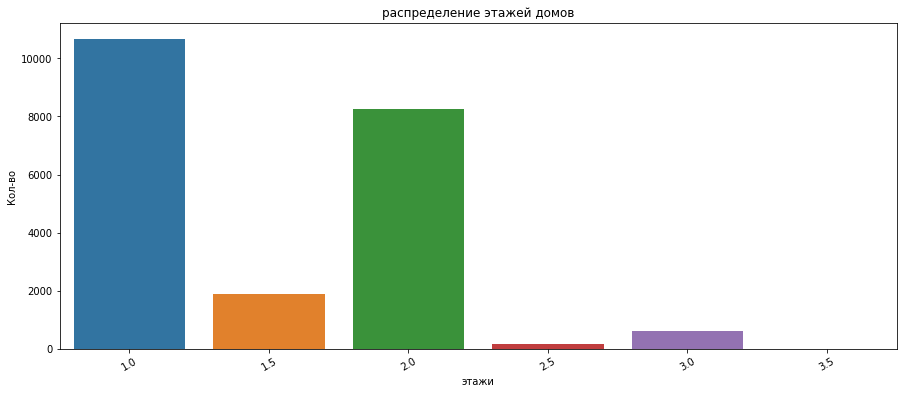

In [34]:
plt.figure(figsize=(15, 6))
sns.barplot(x = data1.index, y = data1)
plt.title('Распределение этажей домов')
plt.xlabel('Этажи')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

###Изучите распределение состояния домов

In [36]:
data2 = df['condition'].value_counts()
data2

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

Text(0, 0.5, 'Кол-во')

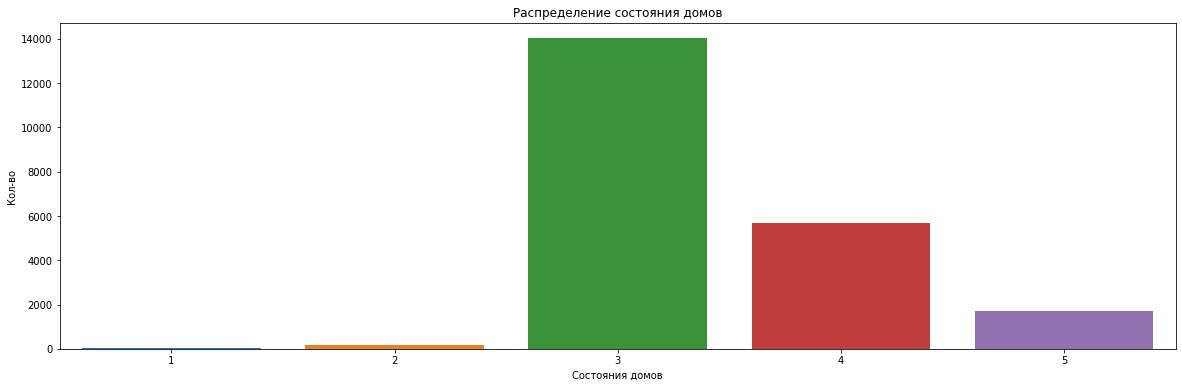

In [39]:
plt.figure(figsize=(20, 6))
sns.barplot(x = data2.index, y = data2)
plt.title('Распределение состояния домов')
plt.xlabel('Cостояния домов')
plt.ylabel('Кол-во')


##Задание 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.  
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

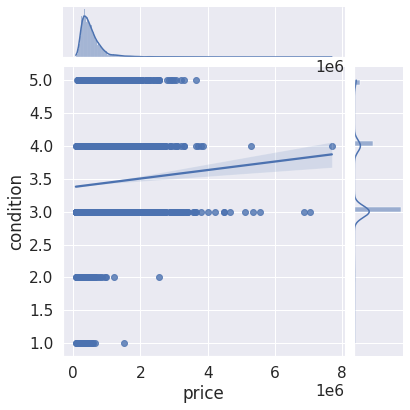

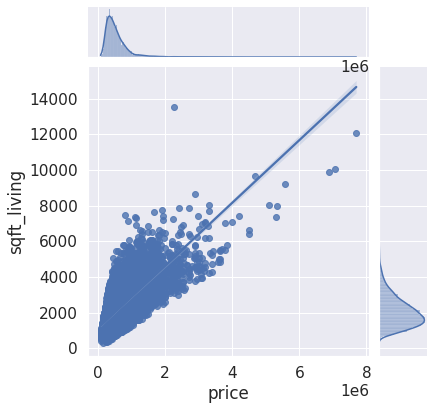

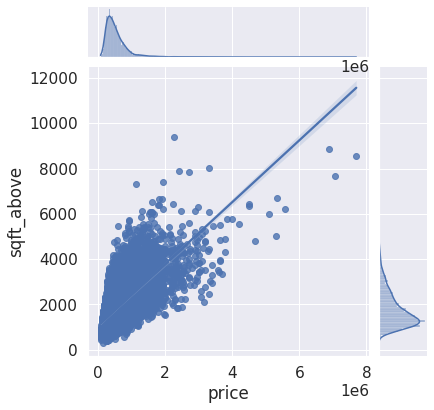

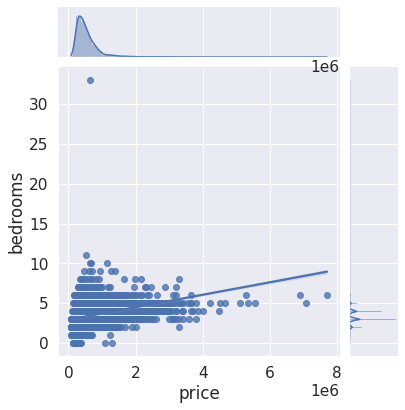

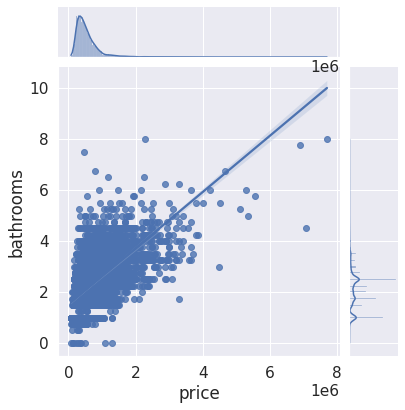

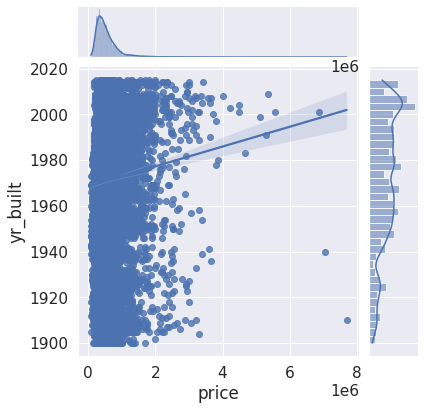

In [50]:
sns.jointplot(x=df['price'], y=df['condition'], kind='reg');
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
sns.jointplot(x=df['price'], y=df['sqft_above'], kind='reg')
sns.jointplot(x=df['price'], y=df['bedrooms'], kind='reg')
sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg')
sns.jointplot(x=df['price'], y=df['yr_built'], kind='reg');

In [43]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


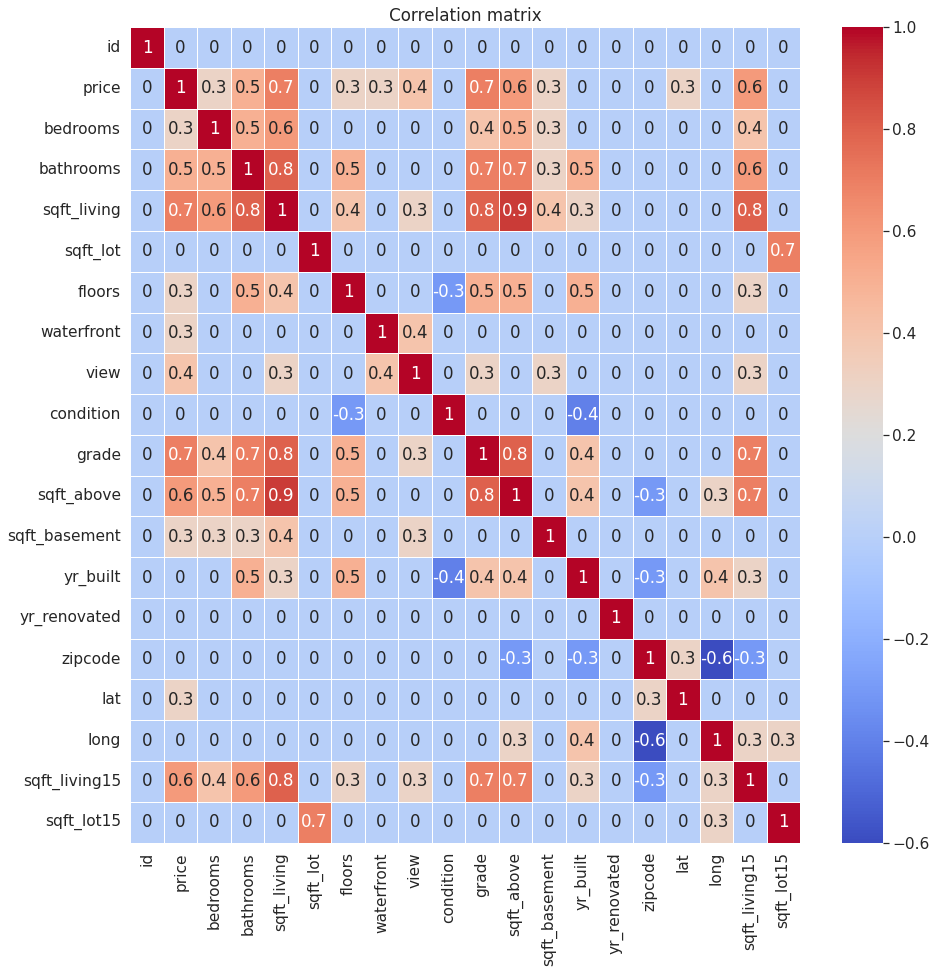

In [46]:
plt.figure(figsize=(15, 15))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

Рассмотрев текущие графики мы можем сделать вывод:  
Наиболее высокую взаимосвязь с ценой имеет показатели жилой и общей площади, количиство ванных комнат.  
Количество комнат меньше влияют на цену недвижимости.  
Слабая связь с ценой у показателей condition и год постройки.


